In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.1+ KB


In [7]:
df.drop(['CustomerID' ,'Genre','Age'],inplace=True,axis=1)    #No need to do that coloumns

KeyError: "['CustomerID' 'Genre' 'Age'] not found in axis"

In [ ]:
df.head()

In [8]:
import matplotlib.pyplot as plt

narr = df.values

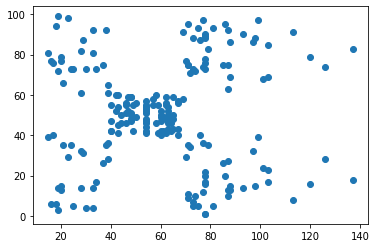

In [73]:
plt.scatter(narr[:,0] , narr[:,1])

In [74]:
import seaborn as sns

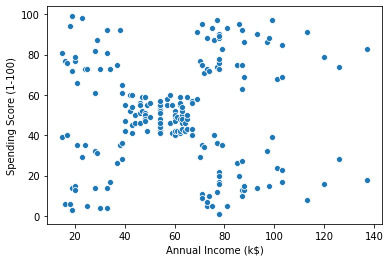

In [75]:
sns.scatterplot(df['Annual Income (k$)'] , df['Spending Score (1-100)'])

In [76]:
from sklearn.cluster import KMeans

In [77]:
km = KMeans(10)     # give n_clusters 

In [78]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [79]:
km.inertia_    # As the number of clusters increases values decreases to 0

19755.6198608334

In [80]:
wcss = []
for i in range(1,41):
    km = KMeans(i)
    km.fit(df)
    wcss.append(km.inertia_)    # As the number of clusters increases values decreases to 0
    

In [81]:
min(wcss)

2808.5393273393274

In [82]:
wcss.index(min(wcss))

39

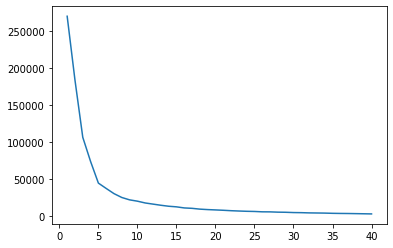

In [83]:
plt.plot(range(1,41), wcss)

In [84]:
# Elbow method is right method to do calculate number of clusters    (  here 5 numbers of clustes )


In [85]:
km = KMeans(5,init='k-means++')


In [86]:
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [87]:
km.predict(df)

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [88]:

df['cluste'] = km.predict(df)

In [89]:
df.head()

,Annual Income (k$),Spending Score (1-100),cluste
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


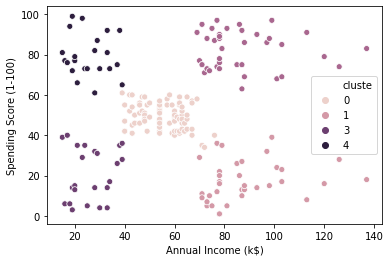

In [90]:
sns.scatterplot(df['Annual Income (k$)'] , df['Spending Score (1-100)'] ,hue=df['cluste'])

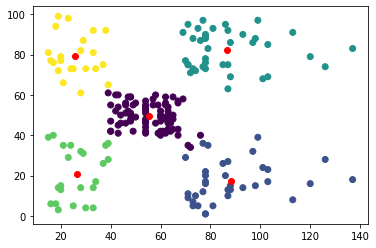

In [95]:
cc  = km.cluster_centers_
narr = df.values
plt.scatter(narr[:,0] , narr[:,1] , c=narr[:,2])
plt.scatter(cc[:,0],cc[:,1], color='red')

In [96]:
plt.scatter(narr[cluste==0,0],narr[cluste==0,1],c = 'red')
plt.scatter(narr[cluste==1,0],narr[cluste==1,1],c = 'blue')
plt.scatter(narr[cluste==2,0],narr[cluste==2,1],c = 'green')
plt.scatter(narr[cluste==3,0],narr[cluste==3,1],c = 'cyan')
plt.scatter(narr[cluste==4,0],narr[cluste==4,1],c = 'yellow')


NameError: name 'cluste' is not defined